<a href="https://colab.research.google.com/github/SS-yong/Manufacturing_Data_Analysis/blob/main/%EC%A0%95%EB%B0%80%EA%B0%80%EA%B3%B5_%ED%92%88%EC%A7%88%EB%B3%B4%EC%A6%9D_AI_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, losses
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import random
import os

In [ ]:
def my_seed_everywhere(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

my_seed_everywhere(42)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSS/DATA')

In [ ]:
# 데이터 호출 및 사본 생성
data = pd.read_csv('./정밀가공_품질보증_데이터셋.csv')
df = data.copy()

In [ ]:
# 데이터 상위 5개 출력
df.head()

,SerialNo,ReceivedDateTime,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z2_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z2_max,...,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z2_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_min,SpindleLoad_std,passorfail
0,20220823-0000185,2022-08-23 03:14:36.906,2227.05,1429.15,1364.51,30.3,4188.47,118.17,85.85,30.3,...,482.595381,19.046612,13.226897,0.0,478.681055,31398.31238,4271.395985,0.0,5320.503114,0
1,20220823-0000186,2022-08-23 03:14:37.884,2227.05,1510.96,3144.13,30.3,4188.47,154.53,173.72,30.3,...,568.919411,21.173073,18.608439,0.0,59.504038,32008.19381,3241.446411,0.0,5001.031891,0
2,20220823-0000187,2022-08-23 03:15:50.892,2227.05,1068.58,3144.13,30.3,4579.34,147.46,93.93,30.3,...,363.842687,18.603881,12.620133,0.0,46.232507,31502.08988,3515.539294,0.0,4963.334281,0
3,20220823-0000188,2022-08-23 03:17:13.888,2224.02,937.28,2377.54,30.3,4183.42,184.83,220.18,30.3,...,479.244638,22.790164,23.841988,0.0,479.783979,31207.89506,3391.720514,0.0,4736.149889,0
4,20220823-0000189,2022-08-23 03:18:26.904,2225.03,681.75,2377.54,30.3,4556.11,177.76,220.18,30.3,...,492.930251,21.737386,24.969696,0.0,337.164170,32091.01381,3114.918299,0.0,4825.433523,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SerialNo              1085 non-null   object 
 1   ReceivedDateTime      1085 non-null   object 
 2   SpindleSpeed_max      1085 non-null   float64
 3   ServoCurrent_X_max    1085 non-null   float64
 4   ServoCurrent_Z1_max   1085 non-null   float64
 5   ServoCurrent_Z2_max   1085 non-null   float64
 6   ServoCurrent_Z3_max   1085 non-null   float64
 7   ServoLoad_X_max       1085 non-null   float64
 8   ServoLoad_Z1_max      1085 non-null   float64
 9   ServoLoad_Z2_max      1085 non-null   float64
 10  ServoLoad_Z3_max      1085 non-null   float64
 11  SpindleSpeed_mean     1085 non-null   float64
 12  ServoCurrent_X_mean   1085 non-null   float64
 13  ServoCurrent_Z1_mean  1085 non-null   float64
 14  ServoCurrent_Z2_mean  1085 non-null   float64
 15  ServoCurrent_Z3_mean 

In [ ]:
# 양품/불량 개수 확인
df['passorfail'].value_counts()

0    986
1     99
Name: passorfail, dtype: int64

In [ ]:
#결측 개수 확인
df.isnull().sum()

SerialNo                0
ReceivedDateTime        0
SpindleSpeed_max        0
ServoCurrent_X_max      0
ServoCurrent_Z1_max     0
ServoCurrent_Z2_max     0
ServoCurrent_Z3_max     0
ServoLoad_X_max         0
ServoLoad_Z1_max        0
ServoLoad_Z2_max        0
ServoLoad_Z3_max        0
SpindleSpeed_mean       0
ServoCurrent_X_mean     0
ServoCurrent_Z1_mean    0
ServoCurrent_Z2_mean    0
ServoCurrent_Z3_mean    0
ServoLoad_X_mean        0
ServoLoad_Z1_mean       0
ServoLoad_Z2_mean       0
ServoLoad_Z3_mean       0
SpindleSpeed_min        0
ServoCurrent_X_min      0
ServoCurrent_Z1_min     0
ServoCurrent_Z2_min     0
ServoCurrent_Z3_min     0
ServoLoad_X_min         0
ServoLoad_Z1_min        0
ServoLoad_Z2_min        0
ServoLoad_Z3_min        0
SpindleSpeed_std        0
ServoCurrent_X_std      0
ServoCurrent_Z1_std     0
ServoCurrent_Z2_std     0
ServoCurrent_Z3_std     0
ServoLoad_X_std         0
ServoLoad_Z1_std        0
ServoLoad_Z2_std        0
ServoLoad_Z3_std        0
SpindleLoad_

In [ ]:
#데이터프레임 크기 확인
df.shape

(1085, 43)

In [ ]:
# 전처리 전 기초통계
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SpindleSpeed_max,1085.0,2225.902123,3.341816e+00,2211.894950,2224.020000,2226.040000,2227.050000,2233.110000
ServoCurrent_X_max,1085.0,1155.500889,2.987545e+02,280.780000,927.180000,1164.530000,1411.980000,1670.287500
ServoCurrent_Z1_max,1085.0,2214.500866,6.392456e+02,236.340000,1754.370000,2280.580000,2853.250000,3208.770000
ServoCurrent_Z2_max,1085.0,30.300000,7.108704e-15,30.300000,30.300000,30.300000,30.300000,30.300000
ServoCurrent_Z3_max,1085.0,4131.009843,1.063758e+03,42.420000,4200.590000,4344.010000,4631.860000,4714.680000
ServoLoad_X_max,1085.0,136.648811,3.535197e+01,34.340000,108.070000,139.380000,167.660000,189.880000
ServoLoad_Z1_max,1085.0,152.664525,4.589293e+01,17.170000,115.140000,158.570000,198.970000,221.190000
ServoLoad_Z2_max,1085.0,30.300000,7.108704e-15,30.300000,30.300000,30.300000,30.300000,30.300000
ServoLoad_Z3_max,1085.0,1874.666120,1.813848e+03,40.400000,438.340000,478.740000,4168.270000,4184.430000
SpindleSpeed_mean,1085.0,1188.258779,1.366686e+02,518.297403,1172.961582,1238.004133,1266.752993,1445.904118


In [ ]:
# # 변수 별 시각화
# cols = df.columns.tolist()
# plt.figure(figsize=(30, 30))
# for i in range(len(cols)):
#     if (cols[i] != 'SerialNo') & (cols[i] != 'ReceivedDateTime') & (cols[i] != 'passorfail'):
#         plt.subplot(8, 5, i-1)
#         plt.title(cols[i])
#         plt.hist(df[cols[i]])
#         plt.tight_layout()

In [ ]:
# 양품/불량 별 시각화
cols = df.columns.tolist()
plt.figure(figsize=(30, 30))
pos_df = df[df['passorfail']==0]
neg_df = df[df['passorfail']==1]
for i in range(len(cols)):
    if (cols[i] != 'SerialNo') & (cols[i] != 'ReceivedDateTime') & (cols[i] != 'passorfail'):
        plt.subplot(8, 5, i-1)
        plt.title(cols[i])
        plt.hist(pos_df[cols[i]], label='OK')
        plt.hist(neg_df[cols[i]], label='NG')
        plt.legend()
        plt.tight_layout()

In [ ]:
# 고정 변수 제거
df = df[[col for col in df.columns if df[col].nunique() != 1]]

In [ ]:
# 수치형 변수 선택
col_list = []
for i in range(len(df.dtypes)):
    if df.dtypes[i] != object:
        col_list.append(df.columns.tolist()[i])
df = df[col_list]
df

,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z3_max,SpindleSpeed_mean,ServoCurrent_X_mean,ServoCurrent_Z1_mean,...,ServoCurrent_X_std,ServoCurrent_Z1_std,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_std,passorfail
0,2227.05,1429.1500,1364.51,4188.47,118.17,85.85,4173.32,1252.372703,158.419865,196.950000,...,196.189122,220.005195,482.595381,19.046612,13.226897,478.681055,31398.312380,4271.395985,5320.503114,0
1,2227.05,1510.9600,3144.13,4188.47,154.53,173.72,418.14,1180.780641,151.364038,199.617436,...,170.418506,302.613257,568.919411,21.173073,18.608439,59.504038,32008.193810,3241.446411,5001.031891,0
2,2227.05,1068.5800,3144.13,4579.34,147.46,93.93,482.78,1189.072357,143.857452,220.032038,...,134.337028,404.646837,363.842687,18.603881,12.620133,46.232507,31502.089880,3515.539294,4963.334281,0
3,2224.02,937.2800,2377.54,4183.42,184.83,220.18,4178.37,1260.834865,145.801689,249.231149,...,139.374693,392.338631,479.244638,22.790164,23.841988,479.783979,31207.895060,3391.720514,4736.149889,0
4,2225.03,681.7500,2377.54,4556.11,177.76,220.18,4174.33,1221.981176,144.099935,221.322026,...,115.061105,327.140103,492.930251,21.737386,24.969696,337.164170,32091.013810,3114.918299,4825.433523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2226.04,1123.1200,2908.80,4685.39,79.79,85.85,436.32,1275.971216,155.417162,225.980676,...,160.269445,371.641442,538.033991,14.532176,14.142291,62.912823,31598.765060,3610.149090,5021.485569,0
1081,2227.05,910.0100,2434.10,4401.58,141.40,81.81,435.31,1196.194156,157.704286,182.875584,...,154.846370,299.527148,495.464909,18.358585,12.142978,44.714905,32001.787380,3598.271657,4997.717833,0
1082,2227.05,891.8098,2434.10,4401.58,141.40,81.81,435.31,1172.270273,152.973157,182.875584,...,150.200979,299.527148,495.464909,19.276514,12.142978,46.950651,33601.876749,3490.323508,5247.603724,1
1083,2223.01,1217.0500,2934.05,4646.00,153.52,81.81,4145.04,1260.563014,178.064384,266.169589,...,191.038710,509.621721,535.382293,21.134500,13.407021,477.148416,31935.947500,3545.539778,4911.028977,0


In [ ]:
import seaborn as sns

# 변수 별 시각화
cols = df.columns.tolist()
plt.figure(figsize=(30, 30))
for i in range(len(cols)):
    if (cols[i] != 'SerialNo') & (cols[i] != 'ReceivedDateTime') & (cols[i] != 'passorfail'):
        plt.subplot(8, 5, i+1)
        plt.title(cols[i])
        sns.boxplot(y=cols[i], data=df)
        plt.tight_layout()

plt.show()

In [ ]:
#이상치 제거 함수
def outliers(data):
    for col in data.dtypes[data.dtypes!='object'].index:
        if col != 'passorfail':
            q1, q3 = np.percentile(data[data['passorfail'] == 0][col],[25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)

            df = data[data['passorfail'] == 0][~((data[data['passorfail'] == 0][col] > upper_bound) | (data[data['passorfail'] == 0][col] < lower_bound))]
    return df
#이상치 제거
out_df = outliers(df)
out_df = pd.concat([out_df, df[df['passorfail'] == 1]], axis=0)
out_df

,SpindleSpeed_max,ServoCurrent_X_max,ServoCurrent_Z1_max,ServoCurrent_Z3_max,ServoLoad_X_max,ServoLoad_Z1_max,ServoLoad_Z3_max,SpindleSpeed_mean,ServoCurrent_X_mean,ServoCurrent_Z1_mean,...,ServoCurrent_X_std,ServoCurrent_Z1_std,ServoCurrent_Z3_std,ServoLoad_X_std,ServoLoad_Z1_std,ServoLoad_Z3_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_std,passorfail
1,2227.05,1510.9600,3144.13,4188.47,154.53,173.72,418.14,1180.780641,151.364038,199.617436,...,170.418506,302.613257,568.919411,21.173073,18.608439,59.504038,32008.193810,3241.446411,5001.031891,0
2,2227.05,1068.5800,3144.13,4579.34,147.46,93.93,482.78,1189.072357,143.857452,220.032038,...,134.337028,404.646837,363.842687,18.603881,12.620133,46.232507,31502.089880,3515.539294,4963.334281,0
3,2224.02,937.2800,2377.54,4183.42,184.83,220.18,4178.37,1260.834865,145.801689,249.231149,...,139.374693,392.338631,479.244638,22.790164,23.841988,479.783979,31207.895060,3391.720514,4736.149889,0
4,2225.03,681.7500,2377.54,4556.11,177.76,220.18,4174.33,1221.981176,144.099935,221.322026,...,115.061105,327.140103,492.930251,21.737386,24.969696,337.164170,32091.013810,3114.918299,4825.433523,0
5,2227.05,1552.3700,1446.32,4309.67,180.79,208.06,4170.29,1208.864379,154.384771,198.006209,...,159.378992,236.850401,478.947680,22.484720,27.615547,335.803924,31375.776250,3605.246235,5089.014405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2227.05,1318.4136,1885.67,4646.00,177.76,176.75,4141.00,1237.074933,155.065850,237.082041,...,181.018409,300.289143,618.934073,22.926151,19.634615,357.941573,33528.618469,3365.435731,5135.964943,1
1043,2223.01,716.6152,1472.58,4300.58,140.39,83.83,480.76,1226.843724,140.282449,221.544865,...,127.369191,290.381073,683.290293,24.133160,13.885698,87.113290,32597.416751,3300.619855,5135.653785,1
1058,2226.04,644.3598,1937.18,4182.41,181.80,214.12,452.48,1131.962330,140.243142,194.283851,...,108.637486,260.600749,326.865639,21.147211,24.058393,56.801364,33365.003469,3578.940999,5404.331786,1
1069,2224.02,753.2378,1793.76,477.73,116.15,75.75,435.31,1230.070651,151.526933,216.247733,...,144.234537,292.412981,95.064870,19.118856,9.832014,78.449316,32851.008813,3488.090614,5225.305951,1


In [ ]:
out_df.passorfail.value_counts()

0    905
1     99
Name: passorfail, dtype: int64

In [ ]:
# T-test
def ttest(df):
    t_test = []
    for i, col in enumerate(df.columns):
        # 독립표본 t검정
        t = stats.ttest_ind(df[df['passorfail']==1][col], df[df['passorfail']==0][col])
        t_test.append([col, t])
    df_ttest = pd.DataFrame(t_test, columns=['col','tvalue, pvalue'])

    t_list = []
    for i in range(len(df_ttest)):
        # 유의수준 0.05 하에서 기각된 것들만 변수로 채택
        if df_ttest['tvalue, pvalue'][i][1] < 0.05:
            t_list.append(df_ttest['col'][i])

    return df[t_list]

df_ttest = ttest(out_df)
df_ttest

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,SpindleSpeed_max,ServoCurrent_X_mean,ServoCurrent_X_std,ServoLoad_X_std,SpindleLoad_max,SpindleLoad_mean,SpindleLoad_std,passorfail
1,2227.05,151.364038,170.418506,21.173073,32008.193810,3241.446411,5001.031891,0
2,2227.05,143.857452,134.337028,18.603881,31502.089880,3515.539294,4963.334281,0
3,2224.02,145.801689,139.374693,22.790164,31207.895060,3391.720514,4736.149889,0
4,2225.03,144.099935,115.061105,21.737386,32091.013810,3114.918299,4825.433523,0
5,2227.05,154.384771,159.378992,22.484720,31375.776250,3605.246235,5089.014405,0
...,...,...,...,...,...,...,...,...
1032,2227.05,155.065850,181.018409,22.926151,33528.618469,3365.435731,5135.964943,1
1043,2223.01,140.282449,127.369191,24.133160,32597.416751,3300.619855,5135.653785,1
1058,2226.04,140.243142,108.637486,21.147211,33365.003469,3578.940999,5404.331786,1
1069,2224.02,151.526933,144.234537,19.118856,32851.008813,3488.090614,5225.305951,1


In [ ]:
df_ttest.columns

Index(['SpindleSpeed_max', 'ServoCurrent_X_mean', 'ServoCurrent_X_std',
       'ServoLoad_X_std', 'SpindleLoad_max', 'SpindleLoad_mean',
       'SpindleLoad_std', 'passorfail'],
      dtype='object')

In [ ]:
# df_ttest = out_df

In [ ]:
# # 최종 변수 히스토그램 확인
# pos_df = df_ttest[df_ttest['passorfail'] == 0]
# neg_df = df_ttest[df_ttest['passorfail'] == 1]
# cols = df_ttest.columns.tolist()
# plt.figure(figsize=(20, 20))
# for i in range(len(cols)-1):
#     plt.subplot(3, 3, i+1) # plt.subplot(4, 3, i+1)
#     plt.title(cols[i])
#     # plt.hist(df_ttest[cols[i]])
#     plt.hist(pos_df[cols[i]], label = 'OK')
#     plt.hist(neg_df[cols[i]], label = 'NG')
# plt.tight_layout()

In [ ]:
# # 최종 변수 박스플롯 확인
# pos_df = df_ttest[df_ttest['passorfail'] == 0]
# neg_df = df_ttest[df_ttest['passorfail'] == 1]
# cols = df_ttest.columns.tolist()
# plt.figure(figsize=(20, 20))
# for i in range(len(cols)-1):
#     plt.subplot(3, 3, i+1) # plt.subplot(4, 3, i+1)
#     plt.title(cols[i])
#     sns.boxplot(y = df_ttest[cols[i]], x = df['passorfail'])

# plt.tight_layout()

In [ ]:
# #상관관계 시각화
# plt.figure(figsize=(15,15))
# sns.heatmap(data=df_ttest.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='RdBu')

In [ ]:
# Train/Test 구분
X = df_ttest.drop(['passorfail'], axis=1)
y = df_ttest['passorfail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(702, 7) (702,)
(302, 7) (302,)


In [ ]:
# Train set 양품/불량 개수
y_train.value_counts()

0    633
1     69
Name: passorfail, dtype: int64

In [ ]:
# SMOTE 기반 Oversampling
smote = SMOTE(random_state=42,
              sampling_strategy={0 : y_train.value_counts()[0],
                                 1 : y_train.value_counts()[0]},
              k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

0    633
1    633
Name: passorfail, dtype: int64

In [ ]:
# # 데이터 시각화 2D
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
# tsne_results = tsne.fit_transform(X_train)
# tsne_df = pd.DataFrame(tsne_results, columns = ['component 0', 'component 1'])
# tsne_df['target'] = y_train

# tsne_df_0 = tsne_df[tsne_df['target'] == 0]
# tsne_df_1 = tsne_df[tsne_df['target'] == 1]

# plt.figure(figsize=(10, 10))
# plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'black', label = 'acceptance')
# plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'red', label = 'defective')
# plt.xlabel('component 0')
# plt.ylabel('component 1')
# plt.legend()
# plt.show()

In [ ]:
# # 데이터 시각화 3D
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=3)
# tsne_results = tsne.fit_transform(X_train)
# tsne_df = pd.DataFrame(tsne_results, columns = ['component 0', 'component 1', 'component 2'])
# tsne_df['target'] = y_train

# tsne_df_0 = tsne_df[tsne_df['target'] == 0]
# tsne_df_1 = tsne_df[tsne_df['target'] == 1]

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'black', label = 'acceptance')
# ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'red', label = 'defective')
# ax.set_xlabel('component 0')
# ax.set_ylabel('component 1')
# ax.set_zlabel('component 2')
# ax.legend()
# plt.show()

In [ ]:
# # 2차원 시각화
# from sklearn.manifold import TSNE
# for n in range(2, 11):

#     smote = SMOTE(random_state=42, sampling_strategy={0 : y_train.value_counts()[0], 1 : y_train.value_counts()[0]}, k_neighbors=n)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#     tsne = TSNE(n_components=2)
#     tsne_results = tsne.fit_transform(X_train_resampled)
#     tsne_df = pd.DataFrame(tsne_results, columns = ['component 0', 'component 1'])
#     tsne_df['target'] = y_train_resampled

#     tsne_df_0 = tsne_df[tsne_df['target'] == 0]
#     tsne_df_1 = tsne_df[tsne_df['target'] == 1]

#     plt.figure(figsize=(10, 10))
#     plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'black', label = 'acceptance')
#     plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'red', label = 'defective')
#     plt.xlabel('component 0')
#     plt.ylabel('component 1')
#     plt.legend()
#     plt.show()

In [ ]:
# # 3차원 시각화
# from sklearn.manifold import TSNE
# for n in range(2, 11):

#     smote = SMOTE(random_state=42, sampling_strategy={0 : y_train.value_counts()[0], 1 : y_train.value_counts()[0]}, k_neighbors=n)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#     tsne = TSNE(n_components=3)
#     tsne_results = tsne.fit_transform(X_train_resampled)
#     tsne_df = pd.DataFrame(tsne_results, columns = ['component 0', 'component 1', 'component 2'])
#     tsne_df['target'] = y_train_resampled

#     tsne_df_0 = tsne_df[tsne_df['target'] == 0]
#     tsne_df_1 = tsne_df[tsne_df['target'] == 1]

#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'black', label = 'acceptance')
#     ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'red', label = 'defective')
#     ax.set_xlabel('component 0')
#     ax.set_ylabel('component 1')
#     ax.set_zlabel('component 2')
#     ax.legend()
#     plt.show()

In [ ]:
# 정규화 적용
normalizer = Normalizer()
scaler = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train_resampled)
X_test_norm = normalizer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_norm)
X_test_scaled = scaler.transform(X_test_norm)

In [ ]:
# X_train_resampled.loc[0]

In [ ]:
# X_train_norm[0]

In [ ]:
# X_train_scaled[0]

In [ ]:
# X_train_scaled.shape

In [ ]:
# # PCA 활용할 때
# from sklearn.decomposition import PCA
# pca = PCA(0.99)
# pca.fit(X_train_scaled)
# train_pca = pca.transform(X_train_scaled)
# test_pca = pca.transform(X_test_scaled)

In [ ]:
# pca.explained_variance_.shape

In [ ]:
# print('Explained variance ratio :', pca.explained_variance_ratio_)
# pca_ratio = pd.DataFrame({'Explained variance':pca.explained_variance_,
#              'Explained variance ratio':pca.explained_variance_ratio_},
#             index=np.array([f"pca{num+1}" for num in range(pca.explained_variance_.shape[0])]))
# pca_ratio['Cumulative ratio'] = pca_ratio['Explained variance ratio'].cumsum()
# pca_ratio

In [ ]:
#심층 신경망
def Custom_Model(input_dim, dropout_ratio):
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape=(input_dim, )))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(dropout_ratio))
    model.add(Dense(5, activation = 'relu'))
    model.add(Dense(5, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

1 Fold
Epoch 1/300
27/27 [==============================] - 5s 40ms/step - loss: 0.7277 - accuracy: 0.4680 - val_loss: 0.6980 - val_accuracy: 0.3981 - lr: 0.0010
Epoch 2/300
27/27 [==============================] - 0s 16ms/step - loss: 0.6787 - accuracy: 0.5770 - val_loss: 0.6900 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/300
27/27 [==============================] - 0s 15ms/step - loss: 0.6536 - accuracy: 0.6126 - val_loss: 0.6887 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/300
27/27 [==============================] - 1s 22ms/step - loss: 0.6207 - accuracy: 0.6540 - val_loss: 0.6823 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/300
27/27 [==============================] - 0s 18ms/step - loss: 0.5552 - accuracy: 0.7180 - val_loss: 0.6569 - val_accuracy: 0.5261 - lr: 0.0010
Epoch 6/300
27/27 [==============================] - 1s 21ms/step - loss: 0.4932 - accuracy: 0.8081 - val_loss: 0.5899 - val_accuracy: 0.7346 - lr: 0.0010
Epoch 7/300
27/27 [==============================] - 0s 17ms/st

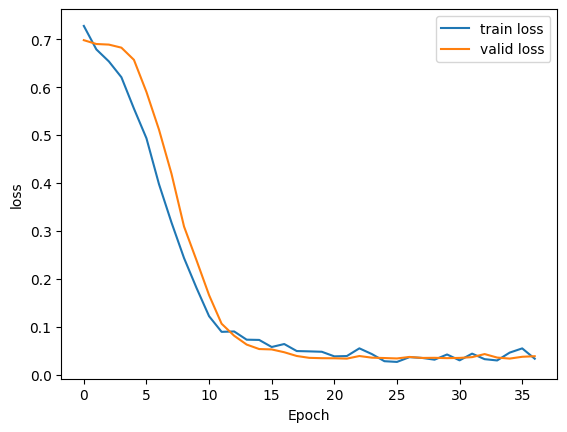

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 3ms/step
2 Fold
Epoch 1/300
27/27 [==============================] - 2s 12ms/step - loss: 0.6062 - accuracy: 0.5059 - val_loss: 0.7239 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/300
27/27 [==============================] - 0s 5ms/step - loss: 0.5312 - accuracy: 0.6327 - val_loss: 0.7516 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.8258 - val_loss: 0.7686 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.9040 - val_loss: 0.7561 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.9467 - val_loss: 0.7334 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3874 - accuracy: 0.9609 - val_loss: 0.6472 - val_accuracy: 0.5024 - lr: 0.0010
Epoch 7/300
27/

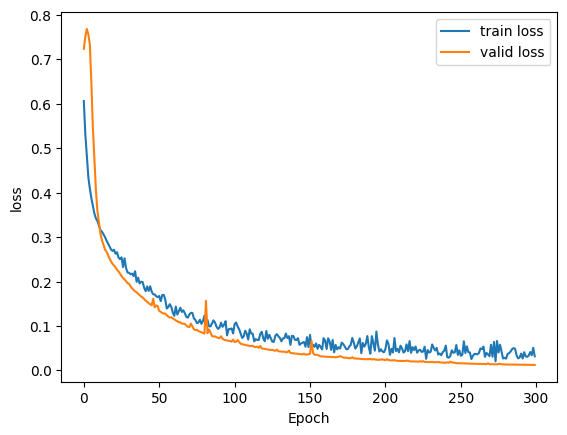

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 2ms/step
3 Fold
Epoch 1/300
27/27 [==============================] - 2s 14ms/step - loss: 0.6968 - accuracy: 0.5249 - val_loss: 0.6801 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6114 - accuracy: 0.5675 - val_loss: 0.6619 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/300
27/27 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.6291 - val_loss: 0.6330 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.7512 - val_loss: 0.5963 - val_accuracy: 0.5071 - lr: 0.0010
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.8294 - val_loss: 0.5567 - val_accuracy: 0.5687 - lr: 0.0010
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4134 - accuracy: 0.8934 - val_loss: 0.5180 - val_accuracy: 0.7085 - lr: 0.0010
Epoch 7/300
27/

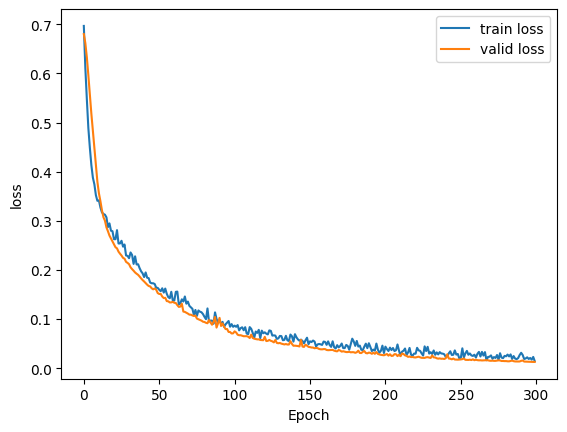

 1/10 [==>...........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 3ms/step


In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
BATCH_SIZE = 32
n_iter = 1
f1_list = []

for train_idx, valid_idx in skf.split(X_train_scaled, y_train_resampled):
    X_train, X_valid = X_train_scaled[train_idx], X_train_scaled[valid_idx]
    y_train, y_valid = y_train_resampled[train_idx], y_train_resampled[valid_idx]

    model = Custom_Model(X_train.shape[1], dropout_ratio = 0.3)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, verbose=1)
    es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=15, verbose=1,
                       mode='min', restore_best_weights=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    print('{} Fold'.format(n_iter))

    history = model.fit(X_train, y_train, callbacks=[es, reduce_lr],
                        epochs=300,
                        validation_data=(X_valid, y_valid))

    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.xlabel('Epoch'); plt.ylabel('loss')
    plt.show()

    model.save('./Model/{}th_fold.h5'.format(n_iter))

    test_predictions = model.predict(X_test_scaled, batch_size=BATCH_SIZE)

    f1 = f1_score(y_test, test_predictions>0.5)
    f1_list.append(f1)

    n_iter+=1

In [ ]:
# f1 score 출력
f1_list

[1.0, 0.967741935483871, 0.967741935483871]

10/10 [==============================] - 0s 2ms/step


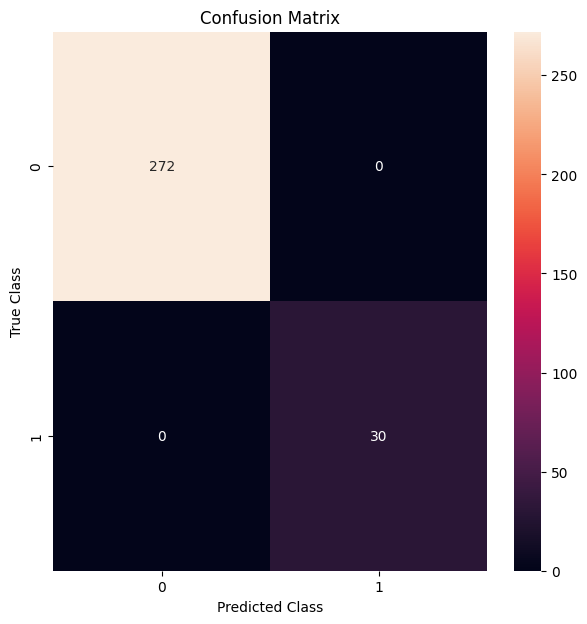

In [ ]:
# 혼동행렬 시각화
best_model = tf.keras.models.load_model('./Model/1th_fold.h5')
test_predictions = best_model.predict(X_test_scaled, batch_size=BATCH_SIZE)
conf_matrix = confusion_matrix(y_test, test_predictions>0.5)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00        30

    accuracy                           1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



AUC score: 1.0


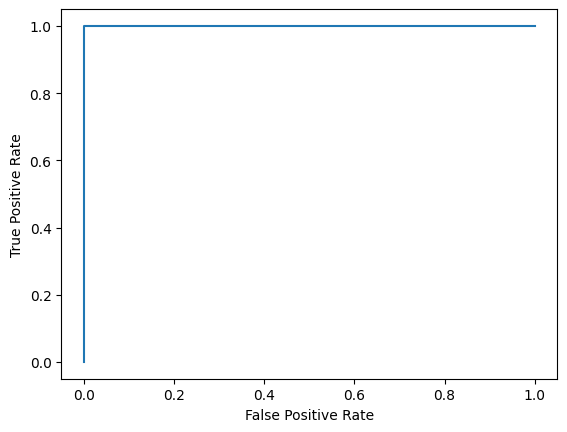

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, test_predictions)
print(f'AUC score: {roc_auc_score(y_test, test_predictions)}')